# House Sales in King County, USA

In [1]:
#import the necessary libraries for dataviz and 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Importing Data Sets 

 Load the csv data into a dataframe  

In [2]:
data = 'kc_house_data.csv'
df_house = pd.read_csv(data)

In [3]:
#display the first 5 columns
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#displays the data types in each column
df_house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
#obtain summary statistics 
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Wrangling

In [6]:
#drop the id  column because it is not useful in our analysis and prediction
df_house.drop(['id'], axis=1, inplace=True)

In [7]:
df_house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#drop any missing values
df_house = df_house.dropna()

In [9]:
#checks if any the columns have null values and prints result
print(df_house.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Since none of the columns have null values, we do not need to replace any values

# Exploratory Data Analysis

Count the number of houses with unique floor values and convert result to a dataframe


In [10]:
#counts the number of houses with unique floor values and converts the result to a dataframe
df_house['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Check for outliers in the dataset to determine which features may vary the prediction results as they directly influence the standard deviation of the values. The outliers may be caused by misrecording of data during data gathering/collection or they may actually be outliers in the real-world caused by factors such as penthouses being pricier than the average house. For this reason, I will not remove any of the outliers.

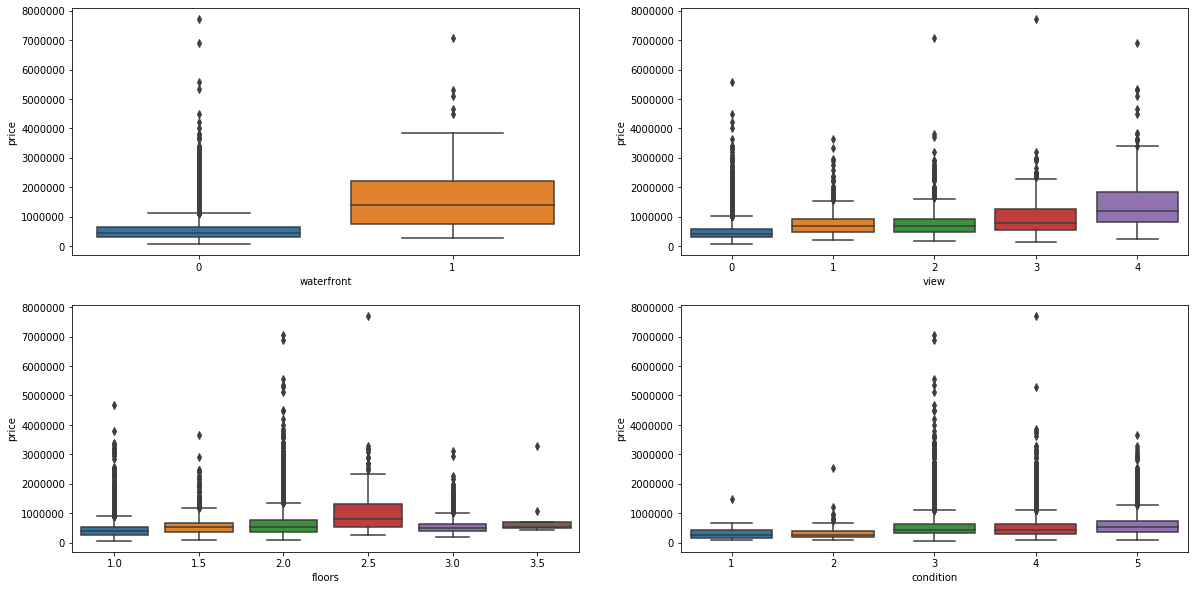

In [11]:
#visualize price outliers in houses with or without a waterfront view, how many times the house has been viewed
#the number of floors, the condition of the house.
fig, axes = plt.subplots(2, 2,figsize=(20,10))
sns.boxplot (x = 'waterfront', y = 'price', data = df_house, ax=axes[0, 0])
sns.boxplot (x = 'view', y = 'price', data = df_house, ax=axes[0, 1])
sns.boxplot (x = 'floors', y = 'price', data = df_house, ax=axes[1, 0])
sns.boxplot (x = 'condition', y = 'price', data = df_house, ax=axes[1, 1])

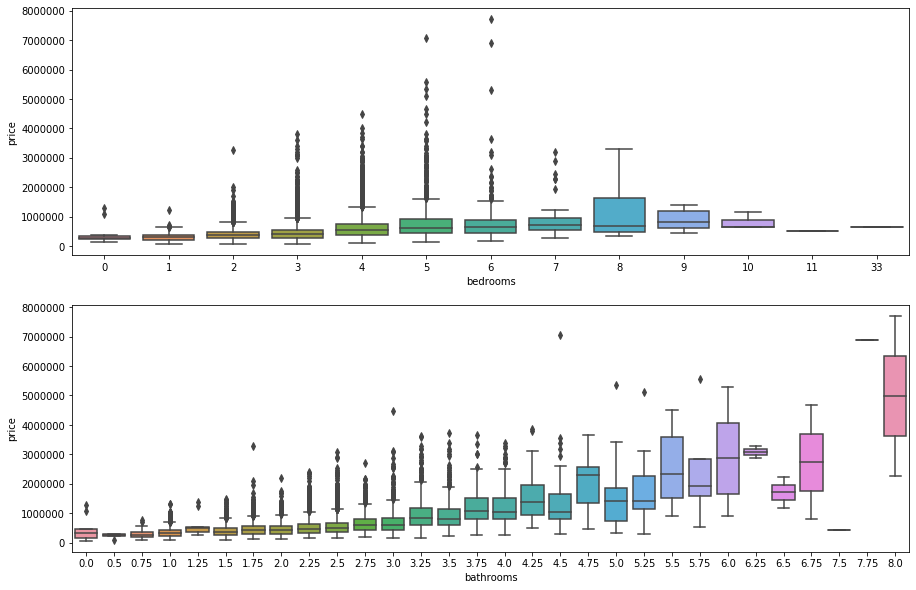

In [12]:
#price outliers in the number of bedrooms, the number of bathrooms
fig, axes = plt.subplots(2, 1,figsize=(15,10))
sns.boxplot (x = 'bedrooms', y = 'price', data = df_house, ax=axes[0])
sns.boxplot (x = 'bathrooms', y = 'price', data = df_house, ax=axes[1])

Find the correlation between the features and sort the results in ascending order

In [13]:
#checks the correlation between price and other values sorted from lowest to highest and converts to dataframe 
df_house.corr()['price'].sort_values().to_frame()

,price
zipcode,-0.053203
long,0.021626
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434
floors,0.256794
waterfront,0.266369
lat,0.307003


In [14]:
#shows how the variables are correlated with each other.
df_house.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


**Correlation Heatmap**

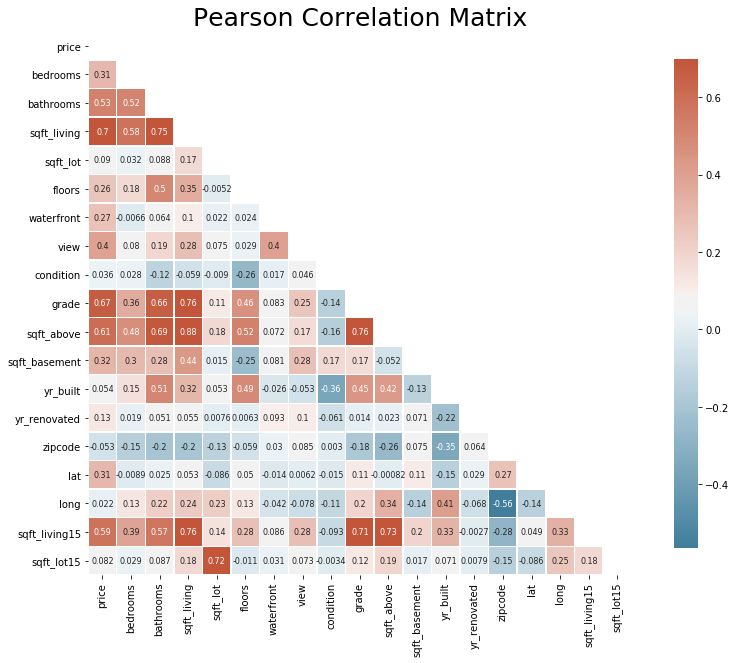

In [15]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']



# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_house[features].corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
plt.title('Pearson Correlation Matrix',fontsize=25)

#custome diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#plot heatmap
sns.heatmap(df_house[features].corr(), linewidths=0.5,vmax=0.7,square=True,cmap=cmap,
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

# Model Development

### Feature Scaling
Before creating models it is important to ensure that the scales of the predictor numerical variables do not vary so much. Therefore, to ensure the scales are similar, I use standardization where the mean value is subtracted and then divides by the standard deviation so that the distribution has unit variance. This in turn ensures that the model performs well.  

In [101]:
#import the necessary modules/libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [17]:
#create new dataframe containing the numerical variables but without the target column and date column
predictors = df_house.drop(['price', 'date'], axis = 1)

#create new array containing just the target column
y_price = df_house['price']
predictors.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Pipelines
Pipelines simply any transformation that needs to be done to the data. In this case, I use a pipeline replace missing values with the median and then standardize the data.

In [47]:
#transform the data: replace missing values with median and standardize
full_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('std_scaler', StandardScaler()),
])
house_predictors = full_pipe.fit_transform(predictors)
house_predictors1 = pd.DataFrame(house_predictors)
house_predictors1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849


#### Divide data into training and testing for regression models

In [48]:
#import module for splitting data into training and test 
from sklearn.model_selection import train_test_split

#split the data into testing and training set with only 15% as testing
x_train, x_test, y_train, y_test = train_test_split(house_predictors, y_price, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Linear Regression
Fitting linear regression model to various features individually.

In [49]:
def regression_model(X, Y, data):
    """Function that fits a linear regression and calculates the value of R^2
    Args:
        string (X): the predictor variable from a dataframe
        string (Y): the target variable from a dataframe
        dataframe : the dataframe containing the variables
    Returns:
        float : the value of r^2
    """
    x = data[[X]]
    y = data[Y]
    lmodel = LinearRegression()
    lmodel.fit(x, y)
    r_squared = lmodel.score(x, y)
    return r_squared

#fit linear regression models and calculate r^2 for various variables/features
print(regression_model('sqft_living', 'price', df_house))
print(regression_model('sqft_basement', 'price', df_house))
print(regression_model('sqft_above', 'price', df_house))

0.49285321790379316
0.104856815269744
0.3667117528382793


Fit a linear regression model to the training data and then compute a prediction and print out the first five predictions

In [89]:
#create linear regression model and fit the data
lm = LinearRegression()
lm.fit(x_train, y_train)

#compute a prediction
predictions = lm.predict(x_test)
print('First five predictions linear-regression:',predictions[0:4])

First five predictions linear-regression: [640491.31608921 479085.55091037 684204.11121012 711121.57157984]


The equation of the regression that is used to make a prediction is 
\begin{equation}
\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 +  \hat{\beta}_i X_i
\end{equation}
where ${\beta}$ is coefficients and X are the independent variables

Print out the value of $R^2$ which tells accuracy of the model or how much of the variation in price can be explained by the model.

In [90]:
print("R-squared for linear-regression:",lm.score(x_test, y_test))

R-squared for linear-regression: 0.69058085623037


This means that 69% of the variation in the house prices is explained by the model

Get the y-intercept and coefficients of the independent variables which help in formulating the regression equation

In [91]:
print('y-intercept for linear-regression',lm.intercept_)

y-intercept for linear-regression 539760.5069829086


In [92]:
print('Coefficeints for linear regression',lm.coef_)

Coefficeints for linear regression [-32457.14666163  32289.56896703  83567.91425681   3925.68922084
   3494.29855129  47196.47487084  42558.94206256  17576.15569915
 111245.56140446  78681.95032465  26202.05806524 -75904.42541684
   7774.22629185 -30156.97902223  84364.63650791 -29868.22122271
   9757.22485296  -9565.31613603]


Calculate the root mean squared error which gives the prediction error that is based on how spread out the residuals are from the regression line. To get this error, we use the true value of y and the predicted value of y.

In [93]:
lm_mse = mean_squared_error(y_test, predictions)
lm_rmse = np.sqrt(lm_mse)
print('Root-mean-squared-error linear regression:',lm_rmse)

Root-mean-squared-error linear regression: 213160.6711067272


This is not a great score because with the values of price ranging from $\$75000$ to $\$7700000$, an error of $\$213160$ is big.

#### Distribution plot
Check how the predicted values compare with the actual values. Even though the predicted values are somewhat close to actual values, there is room for improvement as shown by the rmse

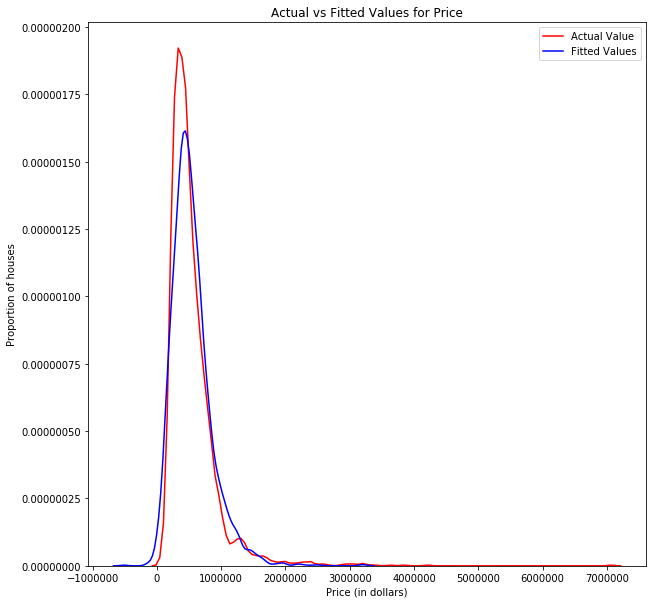

In [66]:
#set the figure to plot and the size
fig, ax = plt.subplots(figsize=(10,10))

#plot the distribution of the actual value of price and the predicted values on the same test.
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax1)

ax.set_title('Actual vs Fitted Values for Price')
ax.set_xlabel('Price (in dollars)')
ax.set_ylabel('Proportion of houses')

plt.show()

### Ridge Regression
This is a regularized form of the linear regression model. The regularization term $\alpha$ is added to the cost function on the training data set. This term keeps the model weights as small as possible while fitting the data which in terms reduces overfitting.

In [76]:
#import Ridge module for creating ridge regression
from sklearn.linear_model import Ridge

In [88]:
#create a Ridge regression object and fit it using the training data. The regularization parameter is set to 0.1
Ridgereg=Ridge(alpha=0.1)
Ridgereg.fit(x_train, y_train)

#obtain a prediction
ridge_pred = Ridgereg.predict(x_test)
print('First five predictions ridge-regression:',ridge_pred[0:4])

First five predictions: [640492.02209493 479084.8357025  684204.96249807 711121.03777297]


In [94]:
#calculate the value of R^2 using the test data
print("R-squared for ridge-regression:",Ridgereg.score(x_test, y_test))

R-squared for ridge-regression: 0.6905808470680685


In [96]:
ridge_mse = mean_squared_error(y_test, ridge_pred) 
ridge_rmse = np.sqrt(ridge_mse)
print('Root-mean-squared-error ridge regression:',ridge_rmse)

Root-mean-squared-error ridge regression: 213160.6742627089


There is no difference between the predictions and rmse of the ridge regression and linear regression. This is probably because the value of alpha is very small such that the model is very similar to the linear model. We can use grid search to tune the model or cross-validation which reduces the testing error as it better models the real world. I will only use grid search for the model that performs best

### Decision Tree Regression
Decision trees fit a sine curve. They help find complex nonlinear relationships in the data. They include noisy observations and as a result they are prone to overfitting. A way to control for this is using a `max-depth` parameter which prunes the tree until we have only the variables that are useful without introducing noise. 

In [104]:
#create a decision tree model, fit the training data, create a prediction for the test data
dtreg = DecisionTreeRegressor()
dtreg.fit(x_train, y_train)
dtr_pred = dtreg.predict(x_test)
print('First five predictions for decision tree regression:',dtr_pred[0:5])

First five predictions for decision tree regression: [489000. 308625. 446250. 756000. 207750.]


In [99]:
print('R^squared for decision tree',dtreg.score(x_test, y_test))

R^squared for decision tree 0.7763537309323384


In [97]:
#calculate the value of rmse
dtr_mse = mean_squared_error(y_test, dtr_pred)
dtr_rmse = np.sqrt(dtr_mse)

print('Root-mean-squared-error decision tree regression:',dtr_rmse)

Scores: 181223.4181722478
Mean: 181223.4181722478
Root-mean-squared-error decision tree regression: 181223.4181722478


The results here imply that the decision tree does a better job in predicting the values because it has a much lower rmse of $\$181146$. It also has a much higher $R^2$ which implies that it does a better job in explaining the variation in price. I will confirm if this the case once I have performed cross-validation on all the models. 

### Random Forest Regression
Random is a form of ensemble learning where a model is built on top of other models. In this case, random forests trains many decision trees on random subsets of the variables giving each variable to be a 'dorminant' variable in a tree. Then the predictions are averaged through bagging and in turn reduces the variance that would result from having too many variables in decision trees. Random forests also decorrelate the data through the random decision trees created.

In [105]:
#create a random forest model, fit the training data, create a prediction for the test data
rforest_reg = RandomForestRegressor()
rforest_reg.fit(x_train, y_train)
rforest_pred = rforest_reg.predict(x_test)
print('First five predictions for random forest regression:',rforest_pred[0:5])

First five predictions for random forest regression: [449810.7        415759.         732049.         714259.
 250595.80666667]


In [106]:
print('R^squared for random forest',rforest_reg.score(x_test, y_test))

R^squared for random forest 0.8742003913600563


In [107]:
#calculate the value of rmse
rforest_mse = mean_squared_error(y_test, rforest_pred)
rforest_rmse = np.sqrt(rforest_mse)

print('Root-mean-squared-error random forest regression:',rforest_rmse)

Root-mean-squared-error random forest regression: 135916.7977677245


Random forests clearly have the best value of $R^2$ that is $87.4%$ of the variation in price can be explained by this model. In addition, it has the lowest value for rmse, almost half that of linear regression. We can further refine the models with cross-validation which as mentioned, further reduces the testing error.

# Model Evaluation and Refinement
As mentioned, the models can be improved using cross-validation which better trains and tests the data. After performing cross validation on all four models, we will then perform grid search to fine-tune the best model and have a model that best predicts the price of a house without overfitting the data. The metric for evaluation will be the model that minimizes rmse and has the highest r^squared. The priority is the rmse such that if a model has the highest r^squared but not the lowest rmse, we will not pick it.

#### Cross-validation on linear regression.

In [109]:
#import feature for cross-validation
from sklearn.model_selection import cross_val_score

#randomly split traininig set into 5 distinct folds and train and evaluate the linear regression
#output the values of r^squared
lrcross = cross_val_score(lm, x_train, y_train, cv=5)
lrcross

#calculate the mean value of r^squared 
np.mean(lrcroos)

0.7001705867364102

In [110]:
#randomly split traininig set into 5 distinct folds and train and evaluate the linear regression 
#output the mean_squared_error
lrcroos = cross_val_score(lm, x_train, y_train, cv=5, scoring="neg_mean_squared_error")
lrcroos

array([-4.85917988e+10, -3.45520402e+10, -3.76058968e+10, -3.58678319e+10,
       -4.27517221e+10])

Scoring produces opposite of MSE(negative values) and therefore negate the result so as to obtain the rmse.

In [112]:
#calulate the root_mean_squared_error, mean and standard deviation
#negative because scoring produces opposite of MSE(negative values) and therefore convert to get rmse
l_rmse_scores = np.sqrt(-lrcroos)

#print out the root_mean_squared_error, mean and standard deviation
print("Scores:", l_rmse_scores)
print("Mean:", l_rmse_scores.mean())
print("Standard deviation:", l_rmse_scores.std())

Scores: [220435.47544207 185881.79091766 193922.3988379  189388.04576106
 206764.8957873 ]
Mean: 199278.52134919778
Standard deviation: 12725.128295510856


This means that the improved linear regression model has a rmse score of approximately 215452 with a standard deviation of $\pm$8923. The value of r^squared for the model is 0.654. That is 65.4% of the variationin price can be explained by the variation in the features used in the model.

Can use one fold to create prediction while the rest of the folds are used as test data as below

In [ ]:
#import the function used to predict from the cross-validation.
from sklearn.model_selection import cross_val_predict

In [ ]:
#obtain a prediction
yhat = cross_val_predict(lm, x_feat, y_price,cv=4)
yhat[0:5]

#### Grid Search
From the comparison of the predicted values and the test data, it is clear that there is a high test error. Therefore use grid search to choose the best value of alpha (hyperparameter used in Ridge regression) that minimizes the test error.

In [ ]:
#import the module
from sklearn.model_selection import GridSearchCV

In [ ]:
#create a dict of parameter values
params= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
params

In [ ]:
#create new ridge regression object
Ridgereg1=Ridge()
Ridgereg1

In [ ]:
#create gridsearch object and use 5-folds cross-validation to train the model and iteratve over hyperparameters
Grids = GridSearchCV(Ridgereg1, params, cv=5, scoring="neg_mean_squared_error")

In [ ]:
#fit the data to the model
Grids.fit(x_feat, y_price)

#get the estimator with the best parameters
BestRidgereg1=Grids.best_estimator_
BestRidgereg1

In [ ]:
cvres = Grids.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

In [ ]:
#test model on test data
BestRidgereg1.score(x_test, y_test)

In [ ]:
#obtain a prediction
yhat2 = BestRidgereg1.predict(x_test)

#compare the predicted values with the test data used
print('predicted:', yhat2[0:4])
print('test set :', y_test[0:4].values)

#### Cross-validation for Ridge regression

In [ ]:
#randomly split traininig set into 5 distinct folds and train and evaluate the ridge regression
#output the values of r^squared
ridge_rcross = cross_val_score(BestRidgereg1, x_feat, y_price, cv=5)
ridge_rcross

#calculate the mean value of R^squared
np.mean(ridge_rcross)

This is a slight improvement in r^squared from the model which used one training and one testing dataset as well as from the hyperparameter tuned model using gridsearch

In [ ]:
#randomly split traininig set into 5 distinct folds and train and evaluate the ridge regression
#output the mean squared errors for the folds
ridge_rcross = cross_val_score(BestRidgereg1, x_feat, y_price, cv=5, scoring="neg_mean_squared_error")
ridge_rcross

In [ ]:
#calulate the root_mean_squared_error, mean and standard deviation
ridge_rmse_scores = np.sqrt(-ridge_rcross)

#print out the root_mean_squared_error, mean and standard deviation
print("Scores:", ridge_rmse_scores)
print("Mean:", ridge_rmse_scores.mean())
print("Standard deviation:", ridge_rmse_scores.std())

This means that the ridge regression model has an rmse score of approximately 215450 with a standard deviation of $\pm$8950. The value of r^squared for the model is 0.654. That is 65.4% of the variationin price can be explained by the variation in the features used in the model.

#### Further refinement
In addition to normal regression above, perform a polynomial transformation to the data and then a ridge regression. Polynomial transformation allows for interacrtions of features to better model the real-world

In [ ]:
#perform a a second order polynomial transform on both the training and testing data to estimate the features
ptran=PolynomialFeatures(degree=2)
x_train_ptran=ptran.fit_transform(x_train)
x_test_ptran=ptran.fit_transform(x_test)

In [ ]:
#creates a Ridge regression object and fits it using the transformed training data. The regularization parameter is set to 0.1
Ridgereg2=Ridge(alpha=0.1)
Ridgereg2.fit(x_train_ptran, y_train)
Ridgereg2.score(x_test_ptran, y_test)

#### Grid Search for polynomial transformation

In [ ]:
params= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

#create new ridge regression object
Ridgereg3=Ridge()
Ridgereg3

In [ ]:
#create gridsearch object and use 5-folds cross-validation to train the model and iteratve over hyperparameters
Grids1 = GridSearchCV(Ridgereg3, params, cv=5, scoring="neg_mean_squared_error")

#fit the data to the model
Grids1.fit(x_feat, y_price)

#get the estimator with the best parameters
BestRidgereg3=Grids1.best_estimator_
BestRidgereg3

In [ ]:
BestRidgereg3.score(x_test_ptran, y_test)

In [ ]:
cvres1 = Grids1.cv_results_
#for mean_score, params in zip(cvres1["mean_test_score"], cvres1["params"]):
#    print(mean_score, params)
pd.DataFrame(cvres1)

In [ ]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_ptran, y_train)
    Rsqu_test.append(RigeModel.score(x_test_ptran, y_test))
    Rsqu_train.append(RigeModel.score(x_train_ptran, y_train))

### Further refinement

This can be achieved by using cross-validation which better trains and tests the data. Additionally can create polynomial regression model which allows for a better fit or ridge regression models which reduces overfitting. Using rmse as a metric, can determine which model best fits the data and will produce the best prediction

In [ ]:
print("Scores:", dtr_rmse)
print("Mean:", dtr_rmse.mean())

In [ ]:
tree_reg.score(house_predictors, target)